# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puquio
Processing Record 2 of Set 1 | beau vallon
Processing Record 3 of Set 1 | gannan
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | joao pinheiro
Processing Record 7 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 1 | illizi
Processing Record 9 of Set 1 | mount gambier
Processing Record 10 of Set 1 | happy valley-goose bay
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | morehead city
Processing Record 13 of Set 1 | kibaya
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | manuel ojinaga
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | newman
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | magadi
Processing Record 20 of Set 1 | kalach-na-donu
Processing Rec

Processing Record 40 of Set 4 | vadso
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | remire-montjoly
Processing Record 43 of Set 4 | sidney
Processing Record 44 of Set 4 | pembroke
Processing Record 45 of Set 4 | kepno
Processing Record 46 of Set 4 | wailua homesteads
Processing Record 47 of Set 4 | al bukayriyah
Processing Record 48 of Set 4 | priargunsk
Processing Record 49 of Set 4 | khanty-mansiysk
Processing Record 0 of Set 5 | wajir
Processing Record 1 of Set 5 | pudozh
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | enewetak
Processing Record 5 of Set 5 | riosucio
Processing Record 6 of Set 5 | hithadhoo
Processing Record 7 of Set 5 | newport east
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | talara
Processing Record 10 of Set 5 | wang sai phun
Processing Record 11 of Set 5 | usinsk
Processing Record 12 of Set 5 | hafnarfjordur
Processing Record 13 of Se

Processing Record 32 of Set 8 | auki
Processing Record 33 of Set 8 | sayan
Processing Record 34 of Set 8 | howrah
Processing Record 35 of Set 8 | aasiaat
Processing Record 36 of Set 8 | san lorenzo
Processing Record 37 of Set 8 | lembar
City not found. Skipping...
Processing Record 38 of Set 8 | mount darwin
Processing Record 39 of Set 8 | salym
Processing Record 40 of Set 8 | port douglas
Processing Record 41 of Set 8 | madalena
Processing Record 42 of Set 8 | deming
Processing Record 43 of Set 8 | sao gabriel da cachoeira
Processing Record 44 of Set 8 | chegdomyn
Processing Record 45 of Set 8 | camabatela
Processing Record 46 of Set 8 | quellon
Processing Record 47 of Set 8 | bam
Processing Record 48 of Set 8 | pindushi
Processing Record 49 of Set 8 | pergamino
Processing Record 0 of Set 9 | terenozek
Processing Record 1 of Set 9 | merrill
Processing Record 2 of Set 9 | berezovyy
Processing Record 3 of Set 9 | adrar
Processing Record 4 of Set 9 | lerwick
Processing Record 5 of Set 9 

Processing Record 20 of Set 12 | strugi-krasnyye
Processing Record 21 of Set 12 | obo
Processing Record 22 of Set 12 | trairi
Processing Record 23 of Set 12 | bage
Processing Record 24 of Set 12 | ad dilam
Processing Record 25 of Set 12 | kattivakkam
Processing Record 26 of Set 12 | korsakov
Processing Record 27 of Set 12 | vilyuysk
Processing Record 28 of Set 12 | usakos
Processing Record 29 of Set 12 | arkhipo-osipovka
Processing Record 30 of Set 12 | tayoltita
Processing Record 31 of Set 12 | la sarre
Processing Record 32 of Set 12 | 'anat al qadimah
Processing Record 33 of Set 12 | penzance
Processing Record 34 of Set 12 | xylokastro
Processing Record 35 of Set 12 | al ghayzah
Processing Record 36 of Set 12 | paradera
City not found. Skipping...
Processing Record 37 of Set 12 | soio
Processing Record 38 of Set 12 | mana
Processing Record 39 of Set 12 | buka
Processing Record 40 of Set 12 | scarborough
Processing Record 41 of Set 12 | plastun
Processing Record 42 of Set 12 | mata-ut

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puquio,-14.7000,-74.1333,10.19,86,94,2.14,PE,1683342010
1,beau vallon,-20.4189,57.6953,25.13,88,75,2.57,MU,1683341683
2,gannan,47.9147,123.5031,17.27,16,7,3.56,CN,1683342011
3,blackmans bay,-43.0167,147.3167,10.85,60,37,2.05,AU,1683342013
4,puerto natales,-51.7236,-72.4875,10.99,91,100,3.09,CL,1683342013


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puquio,-14.7000,-74.1333,10.19,86,94,2.14,PE,1683342010
1,beau vallon,-20.4189,57.6953,25.13,88,75,2.57,MU,1683341683
2,gannan,47.9147,123.5031,17.27,16,7,3.56,CN,1683342011
3,blackmans bay,-43.0167,147.3167,10.85,60,37,2.05,AU,1683342013
4,puerto natales,-51.7236,-72.4875,10.99,91,100,3.09,CL,1683342013


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

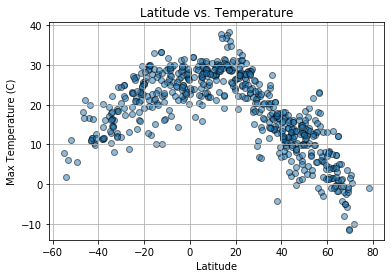

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors= "black", alpha=0.5)
# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

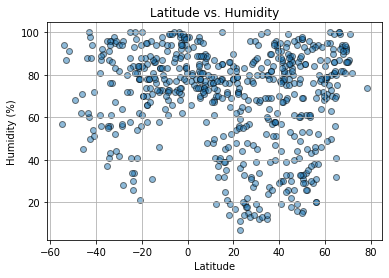

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors= "black", alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

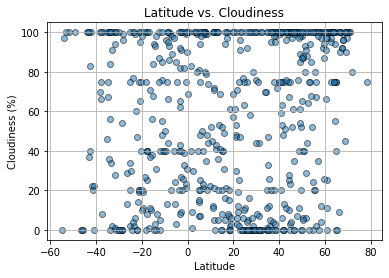

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors= "black", alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

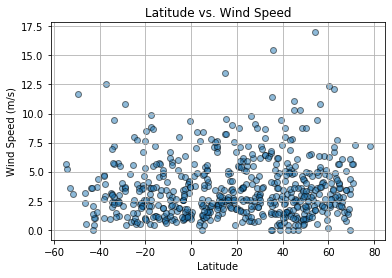

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors= "black", alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plotter(x,y,a,b):
    plt.scatter(x,y,marker="o",edgecolors="black",alpha=0.5)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    print(f"The r-value is: {rvalue}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= pd.DataFrame(city_data_df.loc[city_data_df['Lat']>=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gannan,47.9147,123.5031,17.27,16,7,3.56,CN,1683342011
6,illizi,26.4833,8.4667,22.89,15,5,3.93,DZ,1683342014
8,happy valley-goose bay,53.3168,-60.3315,2.17,60,75,2.57,CA,1683341758
10,morehead city,34.7229,-76.7260,19.44,80,0,1.34,US,1683342015
13,yellowknife,62.4560,-114.3525,13.29,50,75,6.69,CA,1683342017


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= pd.DataFrame(city_data_df.loc[city_data_df['Lat']<0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puquio,-14.7000,-74.1333,10.19,86,94,2.14,PE,1683342010
1,beau vallon,-20.4189,57.6953,25.13,88,75,2.57,MU,1683341683
3,blackmans bay,-43.0167,147.3167,10.85,60,37,2.05,AU,1683342013
4,puerto natales,-51.7236,-72.4875,10.99,91,100,3.09,CL,1683342013
5,joao pinheiro,-17.7425,-46.1725,19.59,58,25,2.03,BR,1683342014


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8636307875597571


Text(0, 0.5, 'Max Temperature')

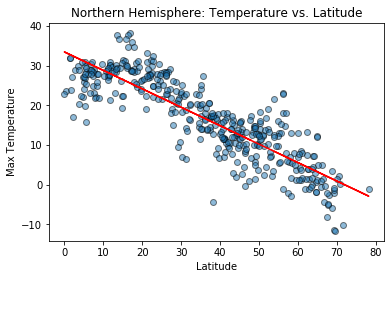

In [22]:
# Linear regression on Northern Hemisphere
plotter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],6,-30)
plt.title("Northern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

The r-value is: 0.6932879363827635


Text(0, 0.5, 'Max Temperature')

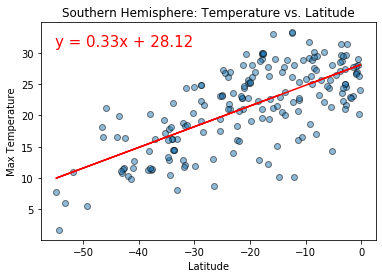

In [23]:
# Linear regression on Southern Hemisphere
plotter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],-55,31)
plt.title("Southern Hemisphere: Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

There is a strong negative correlation in the Northern Hemisphere between temperature and latitude while there is a weak positive correlation in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06255538249437653


Text(0, 0.5, 'Humidity')

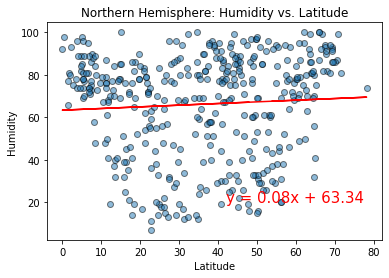

In [24]:
# Northern Hemisphere
plotter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],42,20)
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: 0.23301147394718116


Text(0, 0.5, 'Humidity')

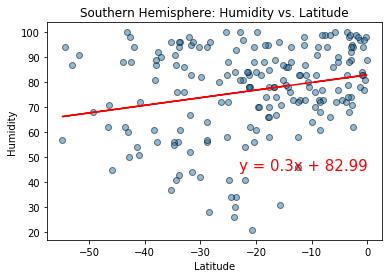

In [25]:
# Southern Hemisphere
plotter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],-23,45)
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

There is a weak positive correlation in the Northern Hemisphere between humidity and latitude while there is a moderately positive correlation in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2404604811526158


Text(0, 0.5, 'Cloudiness')

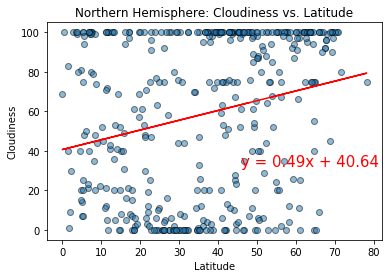

In [26]:
# Northern Hemisphere
plotter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],46,32)
plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: 0.022236677538908452


Text(0, 0.5, 'Cloudiness')

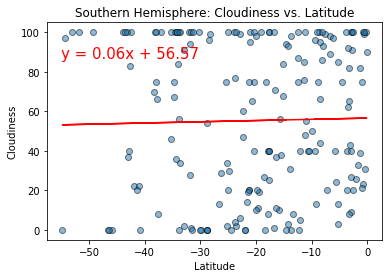

In [27]:
# Southern Hemisphere
plotter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-55,87)
plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

There is a weak positive correlation in both the Northern and Southern hemisphere for cloudiness versus latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.018515958805848182


Text(0, 0.5, 'Wind Speed')

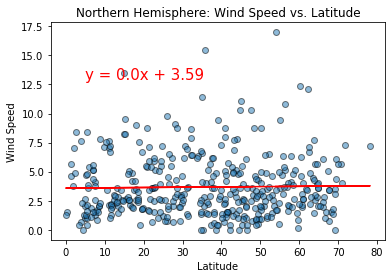

In [28]:
# Northern Hemisphere
plotter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],5,13)
plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: -0.09815912043059806


Text(0, 0.5, 'Wind Speed')

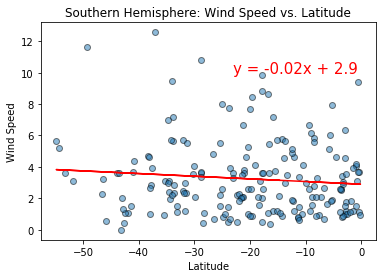

In [29]:
# Southern Hemisphere
plotter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-23,10)
plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

There is a weak positive correlation in the Northern Hemisphere and a weak negative correlation in the Southern Hemisphere in regards to wind speed versus latitude.